## Loading Modules and Data

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn
plt.style.use('ggplot')

data_set = keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels) , (test_images, test_labels) = data_set 

## Training of the Convolutional Neural Network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 9)         252       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 72, 72, 1)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 1)         0

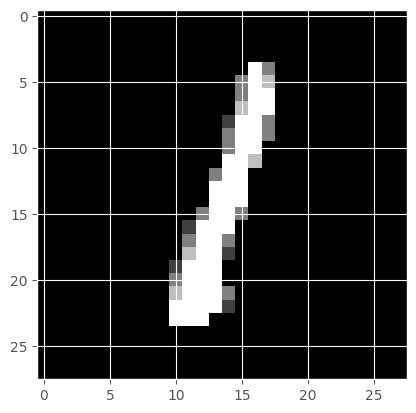

In [3]:
#%% Training NN

train_images_compressed = train_images/255
test_images_compressed = test_images/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Reshape((28,28, 1)),
    keras.layers.Conv2D(3,3, activation='relu'),
    keras.layers.Conv2D(9,3, activation='relu'),
    keras.layers.Flatten(), # intermediate flat layer for visualisation (5)
    keras.layers.Reshape((72,72,1), input_shape=(5184,) ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(), # intermediate flat layer for visualisation (8)
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(50, activation='relu'), # intermediate flat layer for visualisation (12)
    keras.layers.Dense(10, activation='softmax') # output layer 
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

print(model.summary())

model.fit(train_images, train_labels, epochs=2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print()
print('Test Accuracy:', round(test_acc,3))
print('Test Loss:', round(test_loss,3))

#%% Predictions

predictions = model.predict(test_images)
index = random.randint(0, len(predictions)-1)
print('Prediction', np.argmax(predictions[index]))

print('Reality', test_labels[index])

plt.imshow(test_images[index], cmap='gray', vmin=0, vmax=255)
plt.show()

## PCA and TSNE Visualisation

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#%% Ploting PCA 2D

myPalette = ['white', 'pink', 'yellow', 'orange', 'grey', 
             'red', 'purple', 'green', 'blue', 'black']

def PCA_2D(Xdata, Ylabels) :
    
    scaler = StandardScaler()
    scaler.fit(Xdata)
    X_scaled = scaler.transform(Xdata)
         
    pca_2 = PCA(n_components=2 , random_state=2022)
    pca_2.fit(X_scaled)
    X_pac_2 = pca_2.transform(X_scaled)
    
    plt.figure(figsize=(10,7))
    
    sns.scatterplot(x=X_pac_2[:, 0], y=X_pac_2[:,1], s=40, 
                    hue=Ylabels, palette=myPalette, alpha=0.7)
    
    plt.title('PCA Analysis', pad=15)
    plt.xlabel("First PC")
    plt.ylabel("Second PC")
    plt.show()

#%% Ploting PCA 3D

def PCA_3D(Xdata, Ylabels) :
    
    scaler = StandardScaler()
    scaler.fit(Xdata)
    X_scaled = scaler.transform(Xdata)
    
    #fig = plt.figure(figsize = (16, 8))
    ax = plt.axes(projection='3d')
    
    pca_3 = PCA(n_components=3 , random_state=2022)
    pca_3.fit(X_scaled)
    X_pac_3 = pca_3.transform(X_scaled)
    
    ax.scatter3D(X_pac_3[:, 0], X_pac_3[:, 1], X_pac_3[:, 2], 
                    c=Ylabels,s=50 , alpha=0.5)
    
    ax.set_title('PCA Analysis', pad=15)
    ax.set_xlabel("First PC")
    ax.set_ylabel("Second PC")
    ax.set_zlabel("Third PC")
    
    
#%% Ploting t-SNE 2D

myPalette = ['white', 'pink', 'yellow', 'orange', 'grey', 
             'red', 'purple', 'green', 'blue', 'black']

def TSNE_2D(Xdata, Ylabels) :
         
    tsne = TSNE(n_components=2)
    tsne_result = tsne.fit_transform(Xdata)
    
    plt.figure(figsize=(10,7))
    
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:,1], s=40, 
                    hue=Ylabels, palette=myPalette, alpha=0.7)
    
    plt.title('t-SNE Analysis', pad=15)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()

(2000, 200)


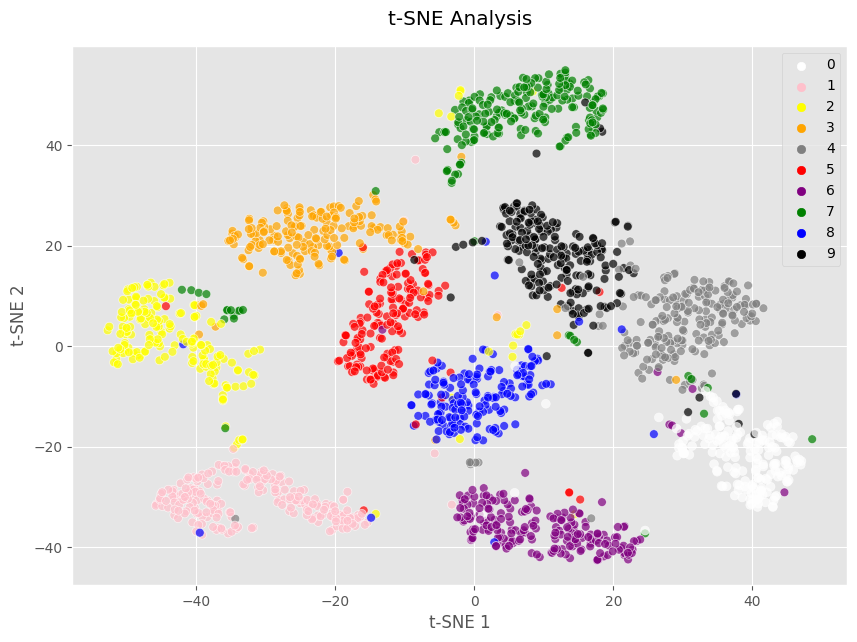

In [10]:
#%% Selecting a single layer :
# Available Layers : 5, 11, 13 
layer_id = 11

if layer_id > len(model.layers):
    layer_id = len(model.layers)

Layers = model.layers[:layer_id]

n_samples = 2000 # Reduce the number of sample for computation reasons

Xtransform = train_images_compressed.copy()[:n_samples]
Xlabels = train_labels.copy()[:n_samples]

for layer in Layers :
    Xtransform = layer(Xtransform)

print(Xtransform.shape)

#PCA_2D(Xtransform, Xlabels)
#PCA_3D(Xtransform, Xlabels)
TSNE_2D(Xtransform, Xlabels)